<a href="https://colab.research.google.com/github/Pnwankwo2/M92/blob/jesse/project_1_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install the required libraries
!pip install prophet

In [3]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as sts

In [4]:
#Identify URL and create dataframe
df = pd.read_csv("https://stats.bis.org/api/v2/data/dataflow/BIS/WS_EER/1.0/D.N.B.US?format=csv",
    index_col='TIME_PERIOD',
    parse_dates=True
)
df

,FREQ,EER_TYPE,EER_BASKET,REF_AREA,UNIT_MEASURE,TIME_FORMAT,COLLECTION,TITLE_TS,OBS_VALUE,OBS_STATUS,OBS_CONF,OBS_PRE_BREAK
TIME_PERIOD,,,,,,,,,,,,
1996-04-11,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),77.43,A,F,NaN
1996-04-12,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),77.37,A,F,NaN
1996-04-13,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),NaN,H,F,NaN
1996-04-14,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),NaN,H,F,NaN
1996-04-15,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),77.49,A,F,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-20,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),104.59,A,F,NaN
2024-09-21,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),NaN,H,F,NaN
2024-09-22,D,N,B,US,882,NaN,A,United States - Nominal - Broad (64 economies),NaN,H,F,NaN


In [6]:
#Drop unwanted columns
df_filtered_columns = df.drop(['FREQ','EER_TYPE','EER_BASKET','REF_AREA','UNIT_MEASURE','TIME_FORMAT','COLLECTION','TITLE_TS','OBS_STATUS','OBS_CONF','OBS_PRE_BREAK'], axis=1)
# df_filtered_columns

#Drop unwanted rows
df_filtered_rows = df_filtered_columns.dropna()
# df_filtered_rows

#rename columns
df_renamed = df_filtered_rows.rename(columns={'TIME_PERIOD':'Date', 'OBS_VALUE':'Exchange_Rate'})
# display(df_renamed.head())

#set index as the date column
# df_renamed = df_renamed.set_index('Date')


display(df_renamed.info())


# df_renamed.describe()

# df_renamed.dtypes

display(df_renamed.head())
display(df_renamed.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7424 entries, 1996-04-11 to 2024-09-24
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Exchange_Rate  7424 non-null   float64
dtypes: float64(1)
memory usage: 116.0 KB


None

,Exchange_Rate
TIME_PERIOD,
1996-04-11,77.43
1996-04-12,77.37
1996-04-15,77.49
1996-04-16,77.41
1996-04-17,77.40


,Exchange_Rate
TIME_PERIOD,
2024-09-18,104.51
2024-09-19,104.39
2024-09-20,104.59
2024-09-23,104.71
2024-09-24,104.47


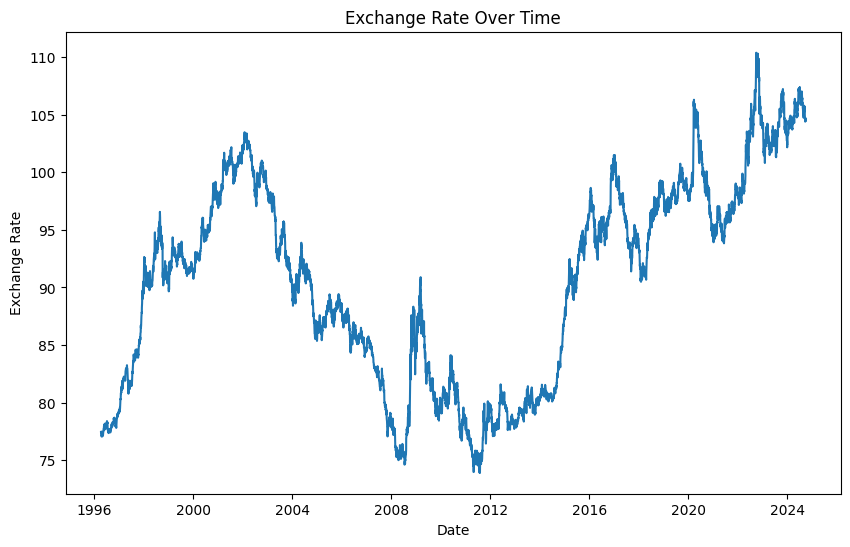

In [7]:
#exhange rate over time
plt.figure(figsize=(10,6))
plt.plot(df_renamed['Exchange_Rate'])
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()


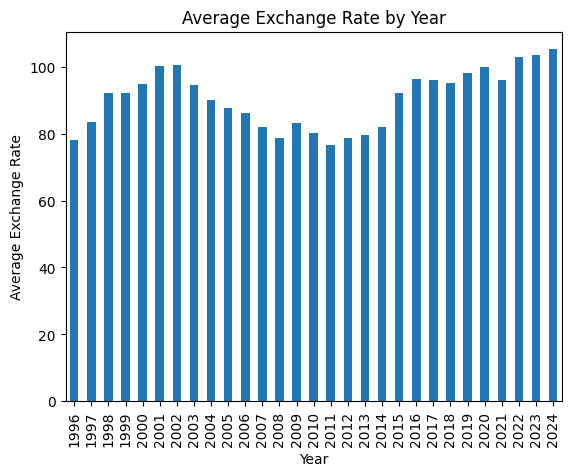

In [8]:
#average exchange rate by year
df_renamed['Year'] = df_renamed.index.year
average_exchange_rate_by_year = df_renamed.groupby('Year')['Exchange_Rate'].mean()
average_exchange_rate_by_year.plot(kind='bar')
plt.title('Average Exchange Rate by Year')
plt.xlabel('Year')
plt.ylabel('Average Exchange Rate')
plt.show()
#

In [9]:
#average exchange rate by year and month
df_renamed['Month'] = df_renamed.index.month
average_exchange_rate_by_month = df_renamed.groupby(['Year', 'Month'])['Exchange_Rate'].mean()
average_exchange_rate_by_month

Year  Month
1996  4         77.313571
      5         77.572609
      6         77.951500
      7         77.910435
      8         77.545000
                  ...    
2024  5        105.228261
      6        106.782500
      7        106.547826
      8        105.657727
      9        105.126471
Name: Exchange_Rate, Length: 342, dtype: float64

In [11]:
mean_numpy = np.mean(df_renamed['Exchange_Rate'])
print(f"The mean exchange rate is {mean_numpy}")

median_numpy = np.median(df_renamed['Exchange_Rate'])
print(f"The median exchange rate is {median_numpy}")

mode_scipy = sts.mode(df_renamed['Exchange_Rate'])
print(f"The mode exchange rate is {mode_scipy}")

std_numpy = np.std(df_renamed['Exchange_Rate'])
print(f"The standard deviation of the exchange rate is {std_numpy}")

varaince_numpy = np.var(df_renamed['Exchange_Rate'])
print(f"The variance of the exchange rate is {varaince_numpy}")

# zscore_scipy = sts.zscore(df_renamed['Exchange_Rate'])
# print(f"The z-score of the exchange rate is {zscore_scipy}")


The mean exchange rate is 90.54327451508621
The median exchange rate is 91.61
The mode exchange rate is ModeResult(mode=78.12, count=13)
The standard deviation of the exchange rate is 8.785854921373664
The variance of the exchange rate is 77.19124669942583


In [12]:

#drop Year and Month Columns
df_renamed_prophet = df_renamed.drop(['Year', 'Month'], axis=1)
df_renamed_prophet

#reset index
df_renamed_prophet = df_renamed_prophet.reset_index()
df_renamed_prophet

#rename columns
df_renamed_prophet = df_renamed_prophet.rename(columns={'TIME_PERIOD':'ds', 'Exchange_Rate':'y'})
df_renamed_prophet

display(df_renamed_prophet.head())
display(df_renamed_prophet.tail())



,ds,y
0,1996-04-11,77.43
1,1996-04-12,77.37
2,1996-04-15,77.49
3,1996-04-16,77.41
4,1996-04-17,77.40


,ds,y
7419,2024-09-18,104.51
7420,2024-09-19,104.39
7421,2024-09-20,104.59
7422,2024-09-23,104.71
7423,2024-09-24,104.47


In [14]:
#call prophet function
prophet_model = Prophet()

# Fit the time-series model.
prophet_model.fit(df_renamed_prophet)

# Make the predictions for the trend data using the df_renamed_prophet DataFrame
prophet_model_future = prophet_model.make_future_dataframe(periods=100, freq='D')

prophet_model_future_forecast = prophet_model.predict(prophet_model_future)


# display(prophet_model_future.tail())

# Display the first five rows of the df_renamed_prophet DataFrame
prophet_model_future_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()
display(prophet_model_future_forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0f55ehc/1baf5dee.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv0f55ehc/_lj0157d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6420', 'data', 'file=/tmp/tmpv0f55ehc/1baf5dee.json', 'init=/tmp/tmpv0f55ehc/_lj0157d.json', 'output', 'file=/tmp/tmpv0f55ehc/prophet_modelwhnf4hwb/prophet_model-20241001233331.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:33:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:33:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-04-11,76.572388,73.971414,78.792710,76.572388,76.572388,-0.155029,-0.155029,-0.155029,-0.113483,-0.113483,-0.113483,-0.041547,-0.041547,-0.041547,0.0,0.0,0.0,76.417359
1,1996-04-12,76.584468,74.189884,78.998410,76.584468,76.584468,-0.155150,-0.155150,-0.155150,-0.104182,-0.104182,-0.104182,-0.050968,-0.050968,-0.050968,0.0,0.0,0.0,76.429318
2,1996-04-15,76.620708,74.173995,78.929002,76.620708,76.620708,-0.183811,-0.183811,-0.183811,-0.103664,-0.103664,-0.103664,-0.080147,-0.080147,-0.080147,0.0,0.0,0.0,76.436896
3,1996-04-16,76.632787,74.038225,78.869936,76.632787,76.632787,-0.195042,-0.195042,-0.195042,-0.105075,-0.105075,-0.105075,-0.089967,-0.089967,-0.089967,0.0,0.0,0.0,76.437746
4,1996-04-17,76.644867,73.989060,78.931376,76.644867,76.644867,-0.203264,-0.203264,-0.203264,-0.103579,-0.103579,-0.103579,-0.099686,-0.099686,-0.099686,0.0,0.0,0.0,76.441603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7519,2024-12-29,105.581155,103.162151,108.035712,105.581155,105.584738,0.113927,0.113927,0.113927,0.264991,0.264991,0.264991,-0.151064,-0.151064,-0.151064,0.0,0.0,0.0,105.695082
7520,2024-12-30,105.585151,102.834549,107.859207,105.585151,105.588877,-0.265708,-0.265708,-0.265708,-0.103664,-0.103664,-0.103664,-0.162044,-0.162044,-0.162044,0.0,0.0,0.0,105.319443
7521,2024-12-31,105.589148,102.862900,107.719495,105.589148,105.592921,-0.277562,-0.277562,-0.277562,-0.105075,-0.105075,-0.105075,-0.172486,-0.172486,-0.172486,0.0,0.0,0.0,105.311586
7522,2025-01-01,105.593145,102.804485,107.824145,105.593145,105.604723,-0.285853,-0.285853,-0.285853,-0.103579,-0.103579,-0.103579,-0.182274,-0.182274,-0.182274,0.0,0.0,0.0,105.307292


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


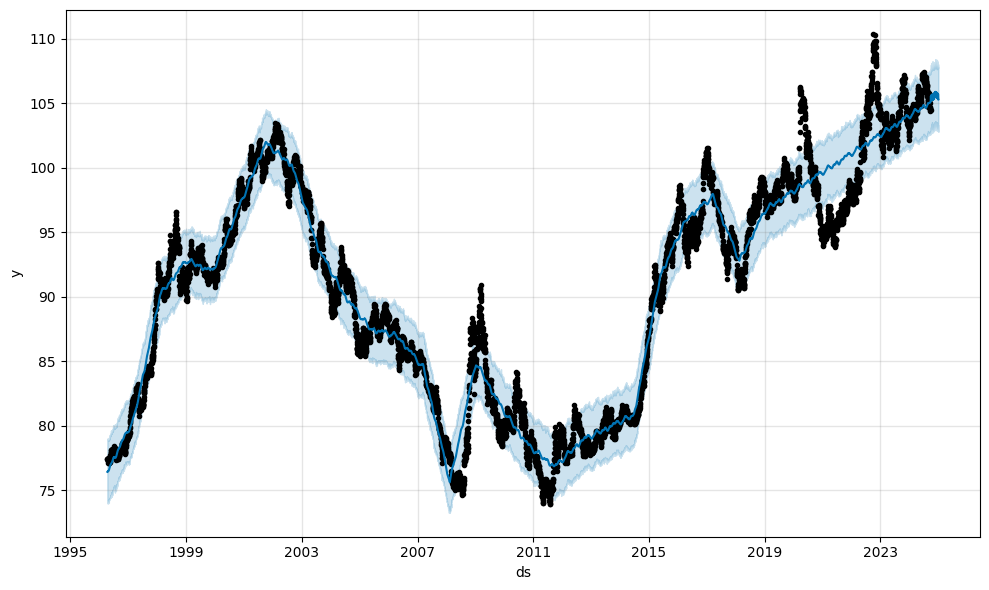

In [15]:
#plot the predictions and show each year on the x axis
prophet_model.plot(prophet_model_future_forecast)
plt.show()

In [40]:
# Step 1: Calculate the yearly average exchange rate
yearly_avg_exchange_rate = df_renamed['Exchange_Rate'].resample('Y').mean()

# Step 2: Filter data to only include September and October for each year
oct_data = df_renamed[(df_renamed.index.month == 10)]

# Step 3: Filter data to only include November and December for each year
nov_data = df_renamed[(df_renamed.index.month ==11)]

# Step 4: Calculate the average exchange rate for September and October for each year
oct_avg_exchange_rate = oct_data['Exchange_Rate'].resample('Y').mean()

# Step 5: Calculate the average exchange rate for November and December for each year
nov_avg_exchange_rate = nov_data['Exchange_Rate'].resample('Y').mean()

# Step 6: Combine both results into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'Yearly Avg Exchange Rate': yearly_avg_exchange_rate,
    'Oct Avg Exchange Rate': oct_avg_exchange_rate,
    'Nov Avg Exchange Rate': nov_avg_exchange_rate
})

# Display the comparison
print(comparison_df)

             Yearly Avg Exchange Rate  Oct Avg Exchange Rate  \
TIME_PERIOD                                                    
1996-12-31                  78.009841              78.423043   
1997-12-31                  83.346054              84.615652   
1998-12-31                  92.076284              91.510909   
1999-12-31                  92.234828              91.359048   
2000-12-31                  94.981577              97.729091   
2001-12-31                 100.189655             100.776957   
2002-12-31                 100.546475             100.624348   
2003-12-31                  94.429119              92.114783   
2004-12-31                  90.060534              89.616667   
2005-12-31                  87.650462              88.360476   
2006-12-31                  86.117885              85.980000   
2007-12-31                  82.023831              79.242609   
2008-12-31                  78.742824              84.067391   
2009-12-31                  83.231916   

<ipython-input-40-3110b43cfa50>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg_exchange_rate = df_renamed['Exchange_Rate'].resample('Y').mean()
<ipython-input-40-3110b43cfa50>:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  oct_avg_exchange_rate = oct_data['Exchange_Rate'].resample('Y').mean()
<ipython-input-40-3110b43cfa50>:14: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  nov_avg_exchange_rate = nov_data['Exchange_Rate'].resample('Y').mean()


In [41]:
# Step 1: Calculate the yearly average exchange rate standard deviation
yearly_avg_exchange_rate = df_renamed['Exchange_Rate'].resample('Y').std()

# Step 2: Filter data to only include September and October standard deviation for each year
oct_data = df_renamed[(df_renamed.index.month == 10)]

# Step 3: Filter data to only include November and December standard deviation for each year
nov_data = df_renamed[(df_renamed.index.month ==11)]

# Step 4: Calculate the average exchange rate for September and October standard deviation for each year
oct_avg_exchange_rate = oct_data['Exchange_Rate'].resample('Y').std()

# Step 5: Calculate the average exchange rate for November and December standard deviation for each year
nov_avg_exchange_rate = nov_data['Exchange_Rate'].resample('Y').std()

# Step 6: Combine both results into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'Yearly Avg Exchange Rate standard deviation': yearly_avg_exchange_rate,
    'Oct Avg Exchange Rate standard deviation': oct_avg_exchange_rate,
    'Nov Avg Exchange Rate standard deviation': nov_avg_exchange_rate
})

# Display the comparison
print(comparison_df)

             Yearly Avg Exchange Rate standard deviation  \
TIME_PERIOD                                                
1996-12-31                                      0.516576   
1997-12-31                                      2.512258   
1998-12-31                                      1.623681   
1999-12-31                                      0.867986   
2000-12-31                                      2.182142   
2001-12-31                                      1.269009   
2002-12-31                                      1.572128   
2003-12-31                                      2.406314   
2004-12-31                                      1.906284   
2005-12-31                                      0.937886   
2006-12-31                                      1.023994   
2007-12-31                                      2.405016   
2008-12-31                                      4.068958   
2009-12-31                                      3.278641   
2010-12-31                              

<ipython-input-41-41c901afd6bb>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_avg_exchange_rate = df_renamed['Exchange_Rate'].resample('Y').std()
<ipython-input-41-41c901afd6bb>:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  oct_avg_exchange_rate = oct_data['Exchange_Rate'].resample('Y').std()
<ipython-input-41-41c901afd6bb>:14: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  nov_avg_exchange_rate = nov_data['Exchange_Rate'].resample('Y').std()


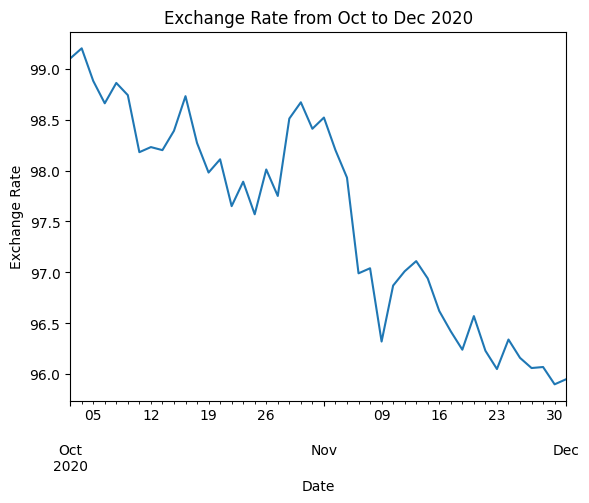

In [22]:
# Filter the DataFrame to only include data between "2020-10-01" and "2020-12-01"
df_filtered = df_renamed.loc["2020-10-01" : "2020-12-01", 'Exchange_Rate']

# Plot the filtered data (y-axis: Exchange_Rate, x-axis: Date)
df_filtered.plot(title='Exchange Rate from Oct to Dec 2020', ylabel='Exchange Rate', xlabel='Date')

# Show the plot
plt.show()

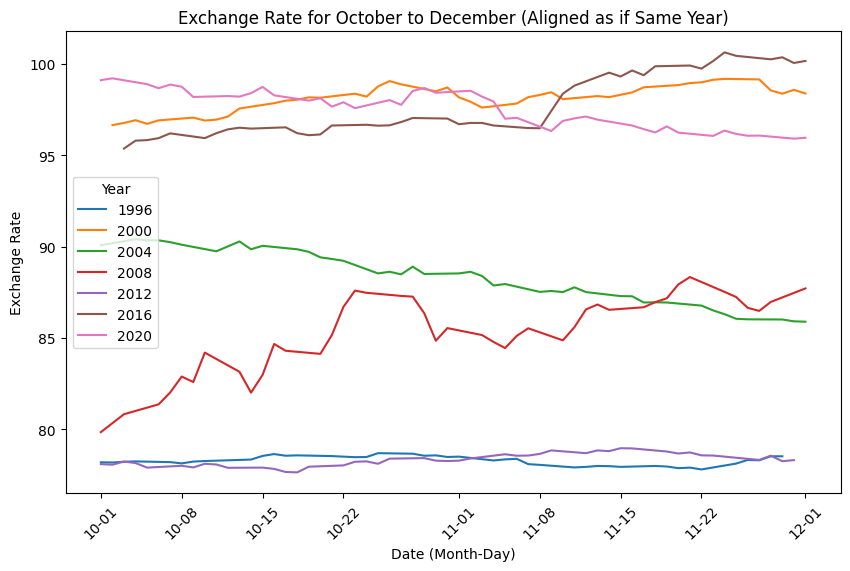

In [38]:
# List of years you want to plot
years = [1996, 2000, 2004, 2008, 2012, 2016, 2020]

# Create a plot
plt.figure(figsize=(10, 6))

# Loop through each year and plot the data
for year in years:
    # Filter the DataFrame for each year from October to December
    df_year = df_renamed.loc[f"{year}-10-01" : f"{year}-12-01", 'Exchange_Rate']

    # Create a new index where we reset the year to be the same for all (e.g., 2020)
    df_year.index = df_year.index.map(lambda x: x.replace(year=2020))

    # Plot the data, labeling it by the actual year
    plt.plot(df_year.index, df_year.values, label=f'{year}')

# Add title and labels
plt.title('Exchange Rate for October to December (Aligned as if Same Year)')
plt.ylabel('Exchange Rate')
plt.xlabel('Date (Month-Day)')

# Format the x-axis labels to show just the month and day
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%d'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend to distinguish lines by year
plt.legend(title="Year")

# Show the plot
plt.show()

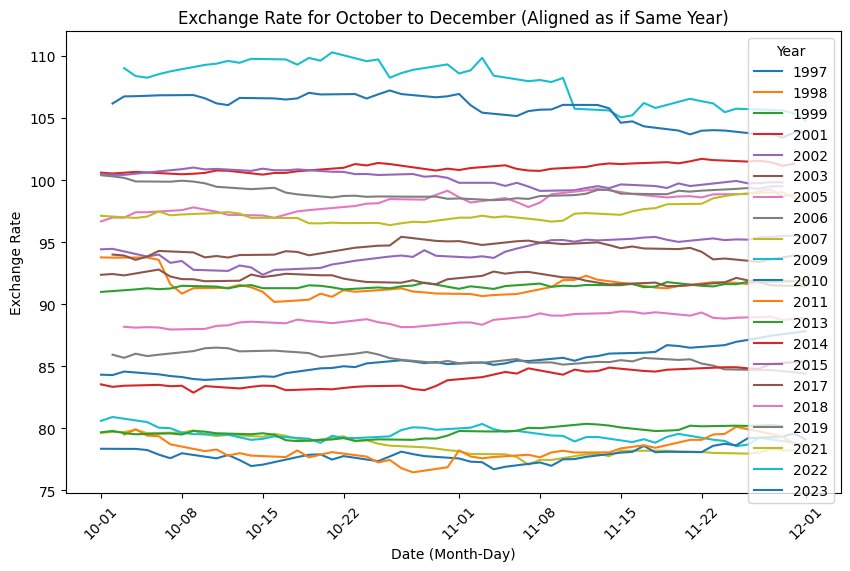

In [39]:
# List of years you want to plot
years = [1997, 1998, 1999, 2001, 2002, 2003, 2005, 2006, 2007, 2009, 2010, 2011, 2013, 2014, 2015, 2017, 2018, 2019, 2021, 2022, 2023]

# Create a plot
plt.figure(figsize=(10, 6))

# Loop through each year and plot the data
for year in years:
    # Filter the DataFrame for each year from October to December
    df_year = df_renamed.loc[f"{year}-10-01" : f"{year}-12-01", 'Exchange_Rate']

    # Create a new index where we reset the year to be the same for all (e.g., 2020)
    df_year.index = df_year.index.map(lambda x: x.replace(year=2020))

    # Plot the data, labeling it by the actual year
    plt.plot(df_year.index, df_year.values, label=f'{year}')

# Add title and labels
plt.title('Exchange Rate for October to December (Aligned as if Same Year)')
plt.ylabel('Exchange Rate')
plt.xlabel('Date (Month-Day)')

# Format the x-axis labels to show just the month and day
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%m-%d'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend to distinguish lines by year
plt.legend(title="Year")

# Show the plot
plt.show()

In [48]:

# Define the election years from 1996 to 2023
election_years = [1996, 2000, 2004, 2008, 2012, 2016, 2020]
# election_years = [1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020]

# Filter for October 1st to November 30th in the Date column
df_filtered = df_renamed[(df_renamed.index.strftime('%m-%d') >= '10-01') &
                         (df_renamed.index.strftime('%m-%d') <= '11-30')]

# Add a column to identify whether the year is an election year or not
df_filtered['Election_Year'] = df_filtered.index.year.isin(election_years)

# Group by 'Election_Year' and calculate the standard deviation for each group
std_dev_by_group = df_filtered.groupby('Election_Year')['Exchange_Rate'].std()

# Display the standard deviations for election years and non-election years
std_dev_by_group

<ipython-input-48-6c7aa9ca668a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Election_Year'] = df_filtered.index.year.isin(election_years)


,Exchange_Rate
Election_Year,
False,9.128353
True,8.366186


In [51]:
# Define the election years from 1996 to 2023
election_years = [1996, 2000, 2004, 2008, 2012, 2016, 2020]
# election_years = [1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020]

# Filter for October 1st to November 30th in the Date column
df_filtered = df_renamed[(df_renamed.index.strftime('%m-%d') >= '10-01') &
                         (df_renamed.index.strftime('%m-%d') <= '11-30')]

# Add a column to identify whether the year is an election year or not
df_filtered['Election_Year'] = df_filtered.index.year.isin(election_years)

# Group by 'Election_Year' and calculate the standard deviation for each group
var_dev_by_group = df_filtered.groupby('Election_Year')['Exchange_Rate'].var()

# Display the standard deviations for election years and non-election years
var_dev_by_group

<ipython-input-51-7e0fd7203ce7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Election_Year'] = df_filtered.index.year.isin(election_years)


,Exchange_Rate
Election_Year,
False,83.326835
True,69.993064
